The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
--- Running Standalone Mean Reversion Test ---
Loading data for symbols: ['CL=F', 'BZ=F']


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
C:\Python_Folder\pyproj\Portfolio\Base_Strategy.py:98: UserWarning:

Object has multiple columns. Aggregating using <function mean at 0x000002BBD0EE7420>. Pass column to select a single column/group.



Data loaded and aligned. Shape of combined data: (2404, 2)
Calculating strategy indicators...
Generating trading signals...

--- Mean Reversion Strategy Performance ---
strategy_name: Oil Correlation (Standalone)
symbol: CL=F-BZ=F
total_return: 166.7147900241124
annual_return: None
max_drawdown: 18.009956650472645
sharpe_ratio: 0.7610391734985704
win_rate: 100.0
total_trades: None
final_value: 266714.7900241124

Generating portfolio plot for CL=F...


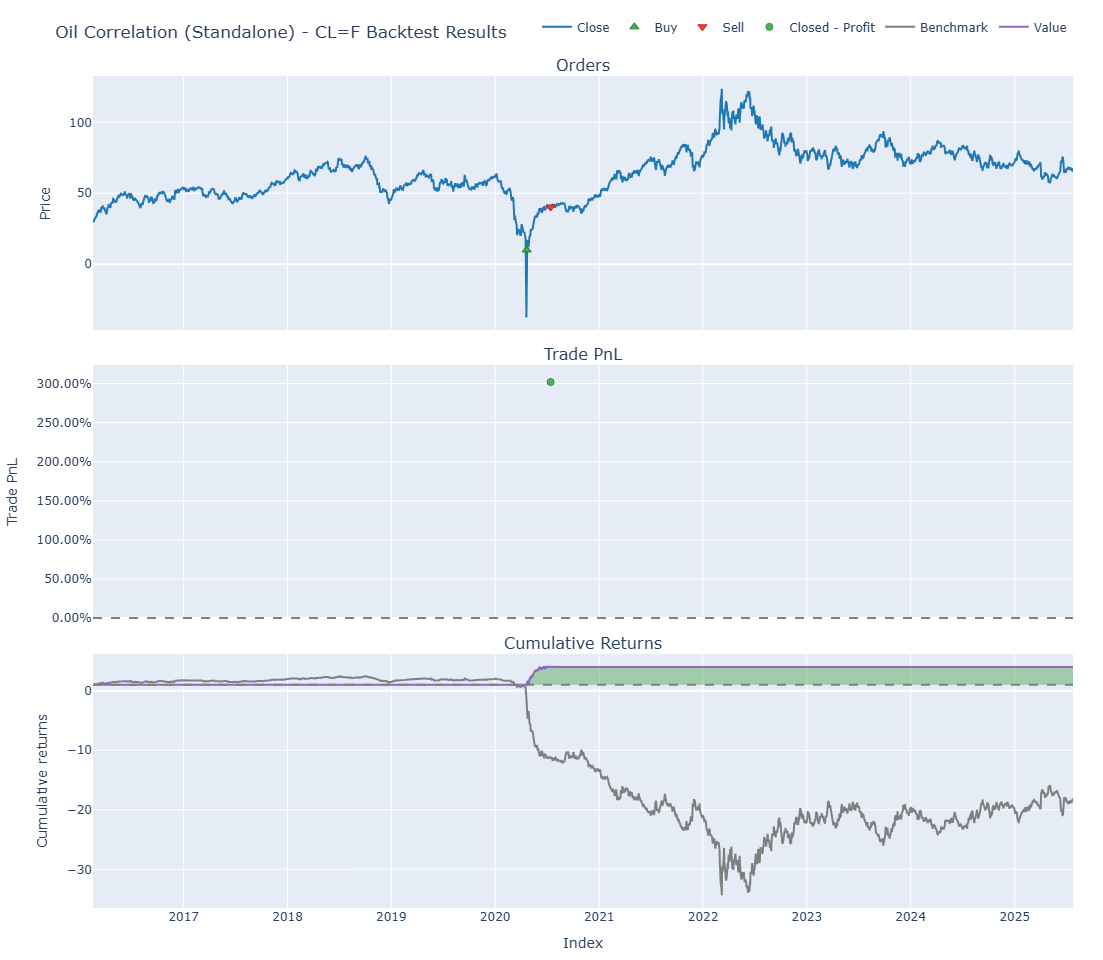


Generating portfolio plot for BZ=F...


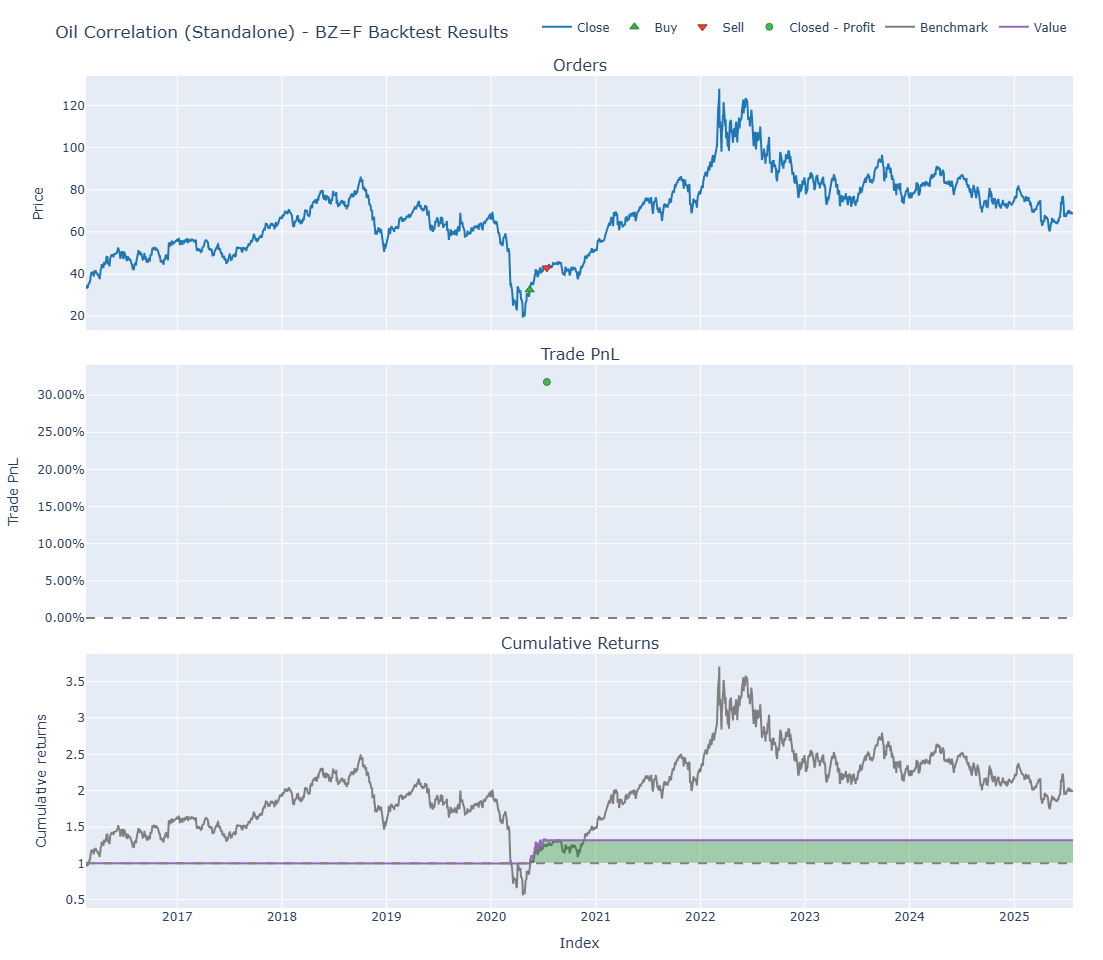



--- Running Standalone Momentum AC Test ---
  > Attempting download for BTC-USD (Attempt 1/3)...


[*********************100%***********************]  1 of 1 completed
C:\Python_Folder\pyproj\Portfolio\Base_Strategy.py:98: UserWarning:

Object has multiple columns. Aggregating using <function mean at 0x000002BBD0EE7420>. Pass column to select a single column/group.



  > Download for BTC-USD successful.

--- Momentum AC Strategy Performance ---
strategy_name: BTC Momentum AC (Standalone)
symbol: BTC-USD
total_return: 6688.685727541126
annual_return: None
max_drawdown: 40.40295497050134
sharpe_ratio: 1.4429533822312577
win_rate: 36.69064748201439
total_trades: None
final_value: 6788685.727541125

Generating portfolio plot for BTC-USD...


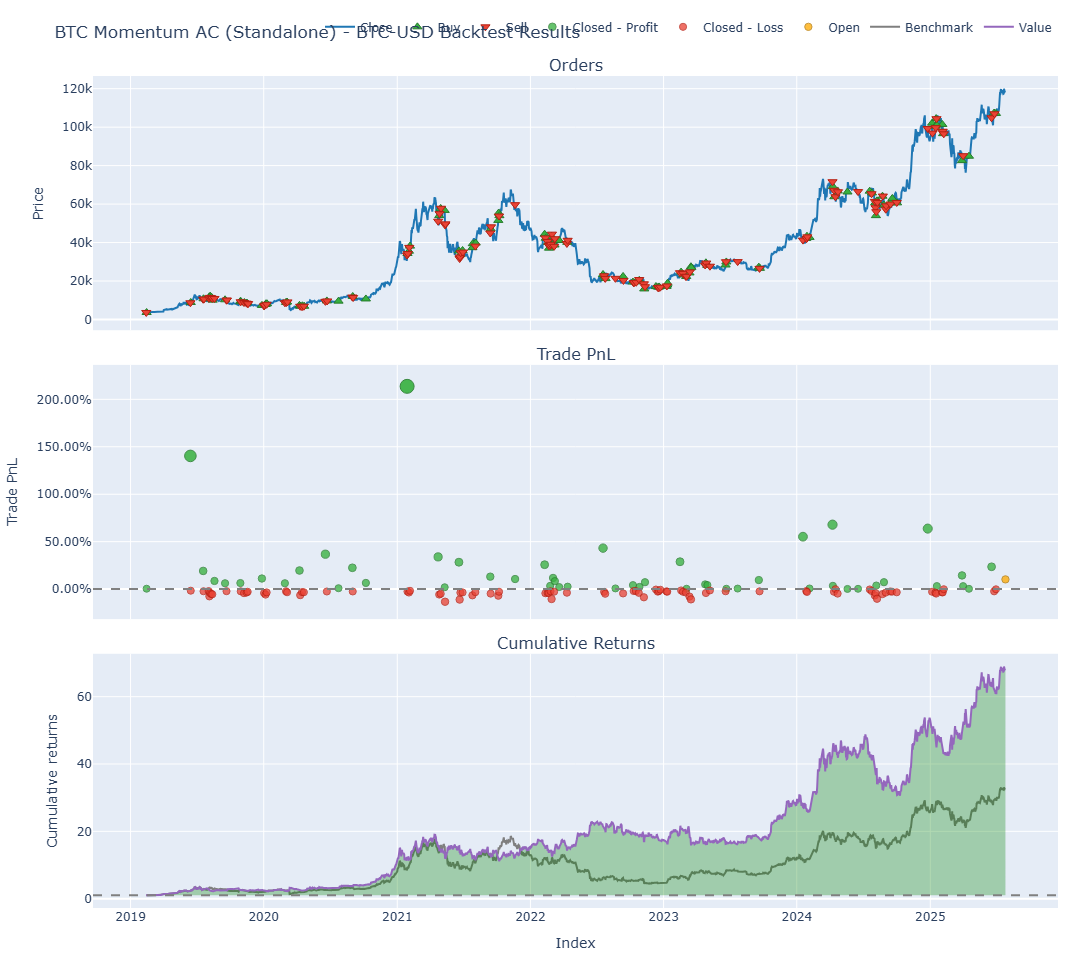



--- Running Standalone Momentum OBV Test ---
  > Attempting download for BTC-USD (Attempt 1/3)...


[*********************100%***********************]  1 of 1 completed


  > Download for BTC-USD successful.

--- Momentum OBV Strategy Performance ---


C:\Python_Folder\pyproj\Portfolio\Base_Strategy.py:98: UserWarning:

Object has multiple columns. Aggregating using <function mean at 0x000002BBD0EE7420>. Pass column to select a single column/group.



strategy_name: BTC Momentum OBV (Standalone)
symbol: BTC-USD
total_return: 2210.718978526993
annual_return: None
max_drawdown: 37.465271531822275
sharpe_ratio: 1.4514843604736234
win_rate: 44.0
total_trades: None
final_value: 2310718.978526993

Generating portfolio plot for BTC-USD...


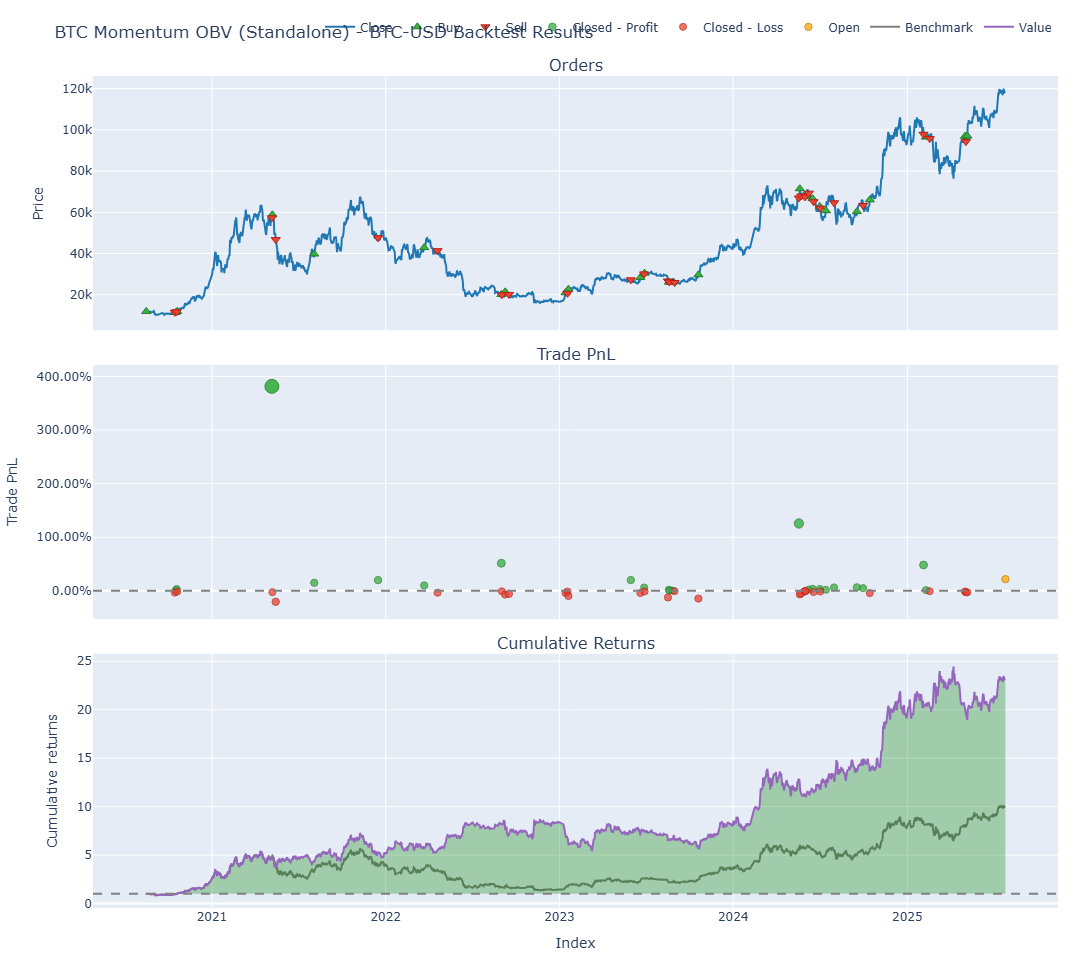



--- Starting Combined Portfolio Run ---
--- Generating Signals for All Strategies ---
Processing Strategy 1/3: Oil Correlation Reversion
  > Using start date: 2016-01-01
Loading data for symbols: ['CL=F', 'BZ=F']


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Data loaded and aligned. Shape of combined data: (2404, 2)
Calculating strategy indicators...
Generating trading signals...
Processing Strategy 2/3: BTC Momentum AC
  > Using start date: 2019-01-07
  > Pausing for 2 seconds before next download...
  > Attempting download for BTC-USD (Attempt 1/3)...


[*********************100%***********************]  1 of 1 completed


  > Download for BTC-USD successful.
Processing Strategy 3/3: BTC Momentum OBV
  > Using start date: 2020-06-01
  > Pausing for 2 seconds before next download...
  > Attempting download for BTC-USD (Attempt 1/3)...


[*********************100%***********************]  1 of 1 completed
C:\Python_Folder\pyproj\Portfolio\Portfolio_Manager.py:105: UserWarning:

Object has multiple columns. Aggregating using <function mean at 0x000002BBD0EE7420>. Pass column to select a single column/group.



  > Download for BTC-USD successful.

--- Combining All Prices and Signals ---
Total Initial Capital: $300000.00
Running combined portfolio backtest...

--- Final Combined Portfolio Stats ---
Start                                2016-02-17 00:00:00
End                                  2025-07-26 00:00:00
Period                                3107 days 00:00:00
Start Value                                     300000.0
End Value                                 7225426.659903
Total Return [%]                             2308.475553
Benchmark Return [%]                          558.850672
Max Gross Exposure [%]                             100.0
Total Fees Paid                                      0.0
Max Drawdown [%]                               28.472035
Max Drawdown Duration                 1150 days 00:00:00
Total Trades                                       48.25
Total Closed Trades                                47.75
Total Open Trades                                    0.5
Open Trade

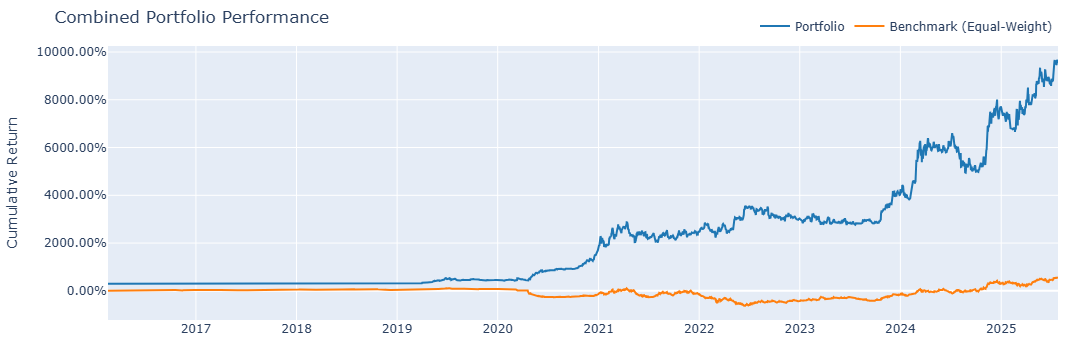

In [13]:
# Cell 1: Setup and Imports
%load_ext autoreload
%autoreload 2

from Portfolio_Manager import PortfolioManager
from CorrArb_Class import MeanReversionCorrelationStrategy
from CTSI_Class import MomentumCryptoACStrategy
from momentum_obv_strategy import MomentumOBVStrategy

# Cell 2: Define Parameters for all strategies
mrc_params = {
    'rolling_window': 30,
    'entry_corr_low': 0.6,
    'exit_corr_high': 0.9,
    'start_date': '2016-01-01'
}

momentum_ac_params = {
    'short_sma_period': 5,
    'long_sma_period': 34,
    'ao_sma_period': 5,
    'start_date': '2019-01-07',
    'sl_stop': 0.02
}

momentum_obv_params = {
    'mom_period': 75,
    'start_date': '2020-06-01'
}


# Cell 3: Standalone Test for Mean Reversion
print("--- Running Standalone Mean Reversion Test ---")
try:
    mrc_standalone = MeanReversionCorrelationStrategy("Oil Correlation (Standalone)", ['CL=F', 'BZ=F'], **mrc_params)
    mrc_standalone.load_data(start_date=mrc_params['start_date'])
    mrc_standalone.backtest(init_cash=100000)
    print("\n--- Mean Reversion Strategy Performance ---")
    mrc_metrics = mrc_standalone.get_performance_metrics()
    for k, v in mrc_metrics.items():
        if k != 'portfolio': print(f"{k}: {v}")
    mrc_standalone.plot_results()
except Exception as e:
    print(f"Standalone mean reversion test FAILED. Error: {e}")


# Cell 4: Standalone Test for Momentum AC
print("\n\n--- Running Standalone Momentum AC Test ---")
try:
    momentum_ac_standalone = MomentumCryptoACStrategy("BTC Momentum AC (Standalone)", 'BTC-USD', **momentum_ac_params)
    momentum_ac_standalone.load_data(start_date=momentum_ac_params['start_date'])
    momentum_ac_standalone.backtest(
        init_cash=100000, 
        fees=0,
        sl_stop=momentum_ac_params.get('sl_stop')
    )
    print("\n--- Momentum AC Strategy Performance ---")
    momentum_ac_metrics = momentum_ac_standalone.get_performance_metrics()
    for k, v in momentum_ac_metrics.items():
        if k != 'portfolio': print(f"{k}: {v}")
    momentum_ac_standalone.plot_results()
except Exception as e:
    print(f"Standalone momentum AC test FAILED. Error: {e}")


# Cell 5: Standalone Test for Momentum OBV Strategy
print("\n\n--- Running Standalone Momentum OBV Test ---")
try:
    mom_obv_standalone = MomentumOBVStrategy("BTC Momentum OBV (Standalone)", "BTC-USD", **momentum_obv_params)
    mom_obv_standalone.load_data(start_date=momentum_obv_params['start_date'])
    mom_obv_standalone.backtest(
        init_cash=100000, 
        fees=0,
        sl_stop=momentum_obv_params.get('sl_stop')
    )
    print("\n--- Momentum OBV Strategy Performance ---")
    mom_obv_metrics = mom_obv_standalone.get_performance_metrics()
    for k, v in mom_obv_metrics.items():
        if k != 'portfolio': print(f"{k}: {v}")
    mom_obv_standalone.plot_results()
except Exception as e:
    print(f"Standalone Momentum OBV test FAILED. Error: {e}")


# Cell 6: Run the Final Combined Portfolio
print("\n\n--- Starting Combined Portfolio Run ---")
mrc_strategy = MeanReversionCorrelationStrategy("Oil Correlation Reversion", ['CL=F', 'BZ=F'], **mrc_params)
momentum_ac_strategy = MomentumCryptoACStrategy("BTC Momentum AC", 'BTC-USD', **momentum_ac_params)
momentum_obv_strategy = MomentumOBVStrategy("BTC Momentum OBV", "BTC-USD", **momentum_obv_params)

all_strategies = [mrc_strategy, momentum_ac_strategy, momentum_obv_strategy]
manager = PortfolioManager(strategies=all_strategies)
manager.run(init_cash_per_strategy=100000, fees=0)

# Cell 7: Final Stats
print("\n--- Final Combined Portfolio Stats ---")
combined_stats = manager.get_stats()
print(combined_stats)

# Cell 8: Final Plot
print("\n--- Plotting Final Combined Portfolio Performance ---")
manager.plot()